# Classify Tweets using Bag-of-Words
Author: Yoaz Menda

## Step 1: Import Necessary Libraries
First, import all the necessary libraries including those for visualization.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/user/nltk_data...


True

## Step 2: Load and Visualize the Dataset
Load the dataset and visualize the first few rows.

,id,topic,tweet
0,3.070000e+17,Sports,99 days to go until the start of #ct13. Did yo...
1,3.060000e+17,Sports,"""Tonight's Scottish First Division match betwe..."
2,2.920000e+17,Sports,"10 off the over, 10 required! Captain Faulkner..."
3,3.040000e+17,Politics,.@GSANetwork raises awareness &amp; stands up ...
4,3.050000e+17,Sports,"""Another wonderful start from England's new-ba..."


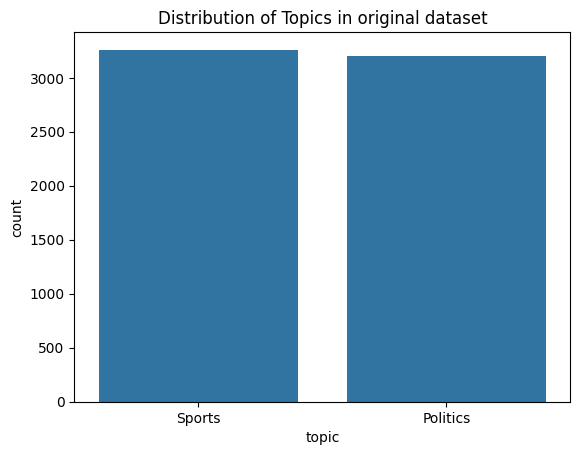

In [2]:
# Load the dataset
df = pd.read_csv('../data/SportPolitics.csv')

# Display the first few rows of the dataframe
display(df.head())

# Plot the distribution of topics
sns.countplot(x='topic', data=df)
plt.title('Distribution of Topics in original dataset')
plt.show()


## Step 3: Preprocess the Data and Visualize Preprocessing Steps
Implement the preprocessing and visualize the effects of each step.

In [3]:
# Preprocessing function
def preprocess(text):
    # Tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(text.lower())
    
    # Remove stop words
    stop_words = stopwords.words('english')
    tokens_no_stop = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_no_stop]
    
    # Stemming
    stemmer = SnowballStemmer('english')
    tokens_stemmed = [stemmer.stem(word) for word in tokens_lemmatized]
    
    return ' '.join(tokens_stemmed)

# preprocess tweets
df['tweet_processed'] = df['tweet'].apply(preprocess)

# Visualize the preprocessing steps for a single tweet example
example_tweet = df['tweet'].iloc[60]
print("Original Tweet:\n", example_tweet)
print("\nProcessed Tweet:\n", preprocess(example_tweet))


Original Tweet:
 RT @ArashMarkazi: Blake Griffin is turning the game into his own personal dunk contest.'

Processed Tweet:
 rt arashmarkazi blake griffin turn game person dunk contest


## Step 4: Explore the Vectorization Process
Before training, explore how the vectorization process transforms our textual data into numeric features.

In [4]:
# Vectorization
vectorizer = CountVectorizer()
X_train, X_val, y_train, y_val = train_test_split(df['tweet_processed'], df['topic'], test_size=0.2, random_state=42)
X_train_bow = vectorizer.fit_transform(X_train)

# Display the feature names and the shape of the resulting matrix
print("Feature names (sample):", vectorizer.get_feature_names_out()[0:10])
print("Shape of Bag of Words matrix:", X_train_bow.shape)

# Display the Bag of Words matrix for the first few tweets
pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out()).head()


Feature names (sample): ['000' '000m' '000th' '01' '02' '02ho2znp' '02min' '02su' '02tazoct' '03']
Shape of Bag of Words matrix: (5168, 11744)


,000,000m,000th,01,02,02ho2znp,02min,02su,02tazoct,03,...,zvaiftn6,zvezdni,zvkwvj8w,zxacoesx,zxb4ujtrsi,zxsauogqkj,zy9wsxyg8d,zzk4o7jqix,zzpmbi1o,zzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Train the Model and Evaluate Performance
Train the logistic regression model and evaluate its performance using classification report and accuracy score.

In [5]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_bow, y_train)

# Predict on the validation set
y_pred = model.predict(vectorizer.transform(X_val))

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Politics       0.97      0.94      0.95       639
      Sports       0.94      0.97      0.96       653

    accuracy                           0.95      1292
   macro avg       0.95      0.95      0.95      1292
weighted avg       0.95      0.95      0.95      1292

Accuracy Score: 0.9543343653250774
